## Observations and Insights

1. The SCC study contains equal proportion of male and female mice, meaning that the results of the study are not biased towards a specific gender.
2. **Overall**, the mice treated with Capomulin (our drug) experience a decrease in tumor volume  over the course of the study.
3. The linear regression results in $R^2 = 0.814$, suggesting that there is a strong positive correlation between the weight of a mouse and the mean tumor volume (over the study period of $45$ days investigated).

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Study data files
mouse_metadata = 'data/Mouse_metadata.csv'
study_results = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset scc_df
# scc = Squamous cell carcinoma (SCC)
scc_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID');

# sort scc_df by timepoint
# scc_df = scc_df.sort_values('Timepoint')

# Checking if all 250 mice are collected in the dataset
print(f"Total mice in merged dataset: {len(scc_df['Mouse ID'].unique())+1}")
print('\n')
print(list(scc_df.columns))
print('\n')
scc_df.head()

Total mice in merged dataset: 250


['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_of_tumor_volume = scc_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_of_tumor_volume = scc_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_of_tumor_volume = scc_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_of_tumor_volume = scc_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean':mean_of_tumor_volume,\
             'Median':median_of_tumor_volume,\
              'Variance':variance_of_tumor_volume,\
              'Standard Error of Mean':sem_of_tumor_volume})

summary_df.round(2)

,Mean,Median,Variance,Standard Error of Mean
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.32,50.85,6.51,0.51
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


## Bar plots

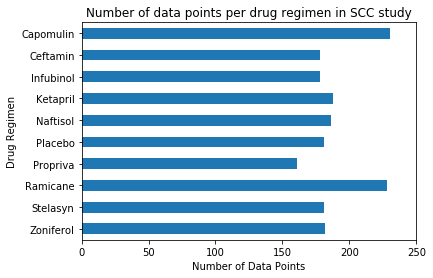

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
scc_datapoints = scc_df.groupby('Drug Regimen')['Mouse ID'].count()
scc_datapoints_chart = scc_datapoints.plot(kind='barh')
scc_datapoints_chart.invert_yaxis()
scc_datapoints_chart.set_xlim([0,250]);
scc_datapoints_chart.set_xlabel('Number of Data Points');
scc_datapoints_chart.set_title('Number of data points per drug regimen in SCC study');

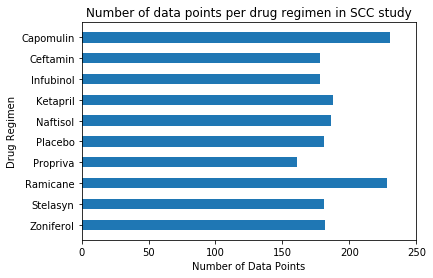

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y_axis_ticks_placeholders = [_ for _ in summary_df.reset_index()['Drug Regimen']]
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Number of Data Points');
ax1.set_title('Number of data points per drug regimen in SCC study');
ax1.set_ylabel('Drug Regimen');
ax1.set_xlim([0,250])
ax1.invert_yaxis();
ax1.barh(y_axis_ticks_placeholders, scc_datapoints, height = 0.5);

## Pie plots

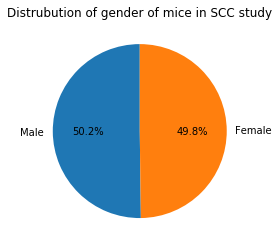

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = scc_df.groupby(['Mouse ID']).first()
gender_distribution = gender_distribution['Sex'].value_counts()

gender_distribution_chart = gender_distribution.plot(kind = 'pie', autopct='%1.1f%%',startangle=90);
gender_distribution_chart.set_ylabel('');
gender_distribution_chart.set_title('Distrubution of gender of mice in SCC study');

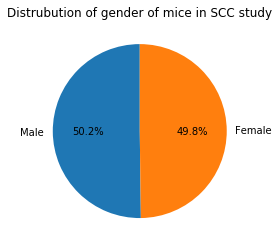

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots()
# ax1.set_xlabel('Number of Data Points');
ax1.set_title('Distrubution of gender of mice in SCC study');
ax1.pie(gender_distribution, autopct='%1.1f%%',startangle=90, labels = ['Male','Female']);

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Four most promising treatment regimens: Capomulin (Our drug), Ramicane, Infubinol, Ceftamin

# setup dicts
dict_of_promising_drugs = {'Capomulin':'',\
                'Ceftamin':'',\
                'Infubinol':'',\
                'Ramicane':''}
dict_of_final_tumor_volumes = {'Capomulin':'',\
                'Ceftamin':'',\
                'Infubinol':'',\
                'Ramicane':''}
dict_of_quartiles = {'Capomulin':'',\
                'Ceftamin':'',\
                'Infubinol':'',\
                'Ramicane':''}

# Sort the dataframe by Mouse ID and Timepoint
sorted_scc_df = scc_df.sort_values(['Mouse ID','Timepoint'], ascending = True)

# Update data dict for the 4 promising drugs
for a_drug in dict_of_promising_drugs.keys():
    dict_of_promising_drugs.update({a_drug : sorted_scc_df[(sorted_scc_df['Drug Regimen'] == a_drug)]})
    

# Using .last() after grouping by Mouse ID will give the last entry for that ID.
# Grabbing Timepoint for this will give the final treatement timepoint for that mouse
# which is the Final Tumor Volume. Only picking: MouseID, Timepoint & Tumor Volume

for a_drug in dict_of_promising_drugs.keys():
    final_tumor_volume_group = dict_of_promising_drugs[a_drug].groupby(['Mouse ID']).last()
    dict_of_final_tumor_volumes.update({a_drug : final_tumor_volume_group.reset_index()[['Mouse ID','Timepoint','Tumor Volume (mm3)']]})

# Calculate Quartiles of final tumor volume for each Drug Regimen
for a_drug in dict_of_quartiles:
    minimum = dict_of_final_tumor_volumes[a_drug]['Tumor Volume (mm3)'].min()
    quartiles = dict_of_final_tumor_volumes[a_drug]['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    middleq = quartiles[0.5]
    upperq = quartiles[0.75]
    maximum = dict_of_final_tumor_volumes[a_drug]['Tumor Volume (mm3)'].max()
    iqr = upperq - lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    dict_of_quartiles.update({a_drug:[lowerq, middleq, upperq, iqr, lower_bound, minimum, upper_bound, maximum]})

# Collect results in a dataframe and show a table for readibility
quartiles_df = pd.DataFrame(dict_of_quartiles)
index_labels = ['Lower Quartile','Median','Upper Quartile', 'Inter-Quartile Range','Lower Bound','Minimum', 'Upper Bound', 'Maximum']
quartiles_df.set_index([index_labels]).round(2)

,Capomulin,Ceftamin,Infubinol,Ramicane
Lower Quartile,32.38,48.72,54.05,31.56
Median,38.13,59.85,60.17,36.56
Upper Quartile,40.16,64.30,65.53,40.66
Inter-Quartile Range,7.78,15.58,11.48,9.10
Lower Bound,20.70,25.36,36.83,17.91
Minimum,23.34,45.00,36.32,22.05
Upper Bound,51.83,87.67,82.74,54.31
Maximum,47.69,68.92,72.23,45.22


### Judging from above table of data summary of all four regimens of interest, 'Infubinol' may have outliers close to the lower bound.

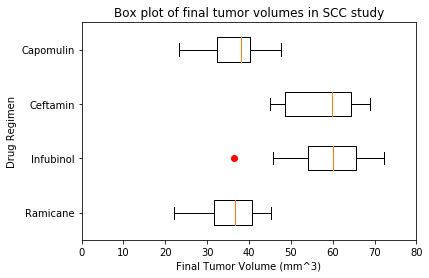

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# test = [a_drug for a_drug in dict_of_final_tumor_volumes[a_drug]['Tumor Volume (mm3)']]
# box_idx = 1
list_of_data = []
box_labels = []
red_circle = dict(markerfacecolor='r', marker='o', markeredgecolor = 'r')

for a_drug in dict_of_final_tumor_volumes:
    list_of_data.append(dict_of_final_tumor_volumes[a_drug]['Tumor Volume (mm3)'])
    box_labels.append(a_drug)

fig, ax1 = plt.subplots()
ax1.set_title('Box plot of final tumor volumes in SCC study')
ax1.set_ylabel('Drug Regimen')
ax1.set_xlabel('Final Tumor Volume (mm^3)')
plt.boxplot(list_of_data, vert = False, positions = [4,3,2,1], labels = box_labels, flierprops=red_circle);
plt.xlim([0,80]);
# list_of_data

## Line and scatter plots

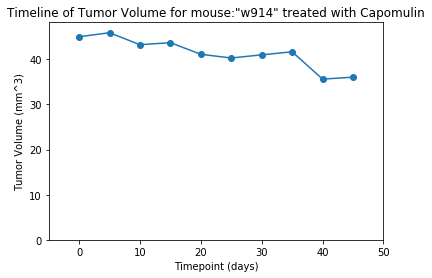

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

our_drug_group = dict_of_promising_drugs['Capomulin'].groupby('Mouse ID')

# Pick a mouse at random from our_drug_group
a_mouse = (random.choice(list(our_drug_group.groups)))

plt.plot(our_drug_group.get_group(a_mouse)['Timepoint'],\
         our_drug_group.get_group(a_mouse)['Tumor Volume (mm3)'],\
        marker = 'o')
plt.ylim([0,max(our_drug_group.get_group(a_mouse)['Tumor Volume (mm3)'])*1.05])
plt.xlim([-5,50])
plt.title(f'Timeline of Tumor Volume for mouse:"{a_mouse}" treated with Capomulin');
plt.ylabel('Tumor Volume (mm^3)');
plt.xlabel('Timepoint (days)');

Text(0.5, 1.0, 'Scatter plot of Mouse weight vs. Average Tumor Volume (mm^3)')

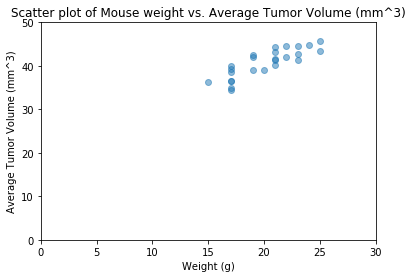

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(our_drug_group['Weight (g)'].first(), \
            our_drug_group['Tumor Volume (mm3)'].mean(),\
           alpha = 0.5)
plt.xlim([0,30])
plt.ylim([0,50])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm^3)');
plt.title('Scatter plot of Mouse weight vs. Average Tumor Volume (mm^3)')

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

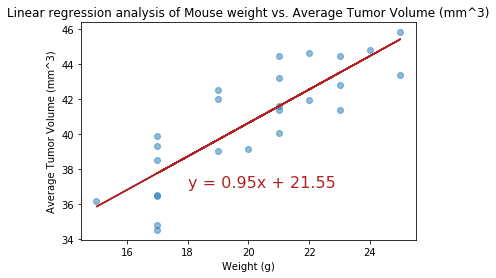

Value of R^2 = 0.709


In [18]:
x_values = our_drug_group['Weight (g)'].first()
y_values = our_drug_group['Tumor Volume (mm3)'].mean()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.5)
plt.plot(x_values,regress_values,color = 'firebrick')
plt.annotate(line_eq,(18,37),fontsize=16,color="firebrick")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.xlim([0,30])
# plt.ylim([0,50])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm^3)');
plt.title('Linear regression analysis of Mouse weight vs. Average Tumor Volume (mm^3)')
plt.show()

print(f'Value of R^2 = {round(rvalue*rvalue,3)}')
